In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install unidecode
from unidecode import unidecode
import numpy as np

In [ ]:
import os
import pandas as pd

path_dataset = '/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/POWER'

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-91-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#Đọc dữ liệu và gom các file crawl từ NASA

In [ ]:
def read_merge_data(path_file1, path_file2):
  file1 = pd.read_csv(path_file1, skiprows= 12, sep=',')
  file2 = pd.read_csv(path_file2, skiprows= 22, sep=',')

  #Xử lý thêm các thuộc tính tọa độ và xóa thuộc tính năm dư
  coordinates = pd.read_csv(path_file1, sep=' ', nrows=1, skiprows= 3, header=None)
  lon = [coordinates.iloc[0][7]]*len(file1)
  lat = [coordinates.iloc[0][3]]*len(file1)
  file1['LON'] = lon
  file1['LAT'] = lat
  file2 = file2.drop(['ALLSKY_SFC_UV_INDEX', 'YEAR', 'DOY'], axis=1) ## bỏ các cột trùng lặp dữ liệu

  #Kết nối 2 bảng dựa trên thuộc tính uv_index
  file = pd.concat([file1, file2], axis=1)


  return file

In [ ]:
def create_data(path_file):
  list_file = []
  for item in os.listdir(path_file):
    path_file1 = os.path.join(path_dataset, item + '/' + item + '_1.csv')
    path_file2 =os.path.join(path_dataset, item + '/' + item + '_2.csv')
    file = read_merge_data(path_file1, path_file2)
    #Thêm thuộc tính tên tỉnh
    file.insert(0, 'LOCATION', [item]*len(file))

    list_file.append(file)

  df = pd.concat(list_file, ignore_index=True)

  return df

In [ ]:
df = create_data(path_dataset)

In [ ]:
df

,LOCATION,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,LON,LAT,...,TS,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WD2M,WS10M,WD10M,GWETTOP
0,AnGiang,2022,10,1,5.04,13.66,0.40,2.02,105.1541,10.5026,...,26.59,19.84,91.19,4.89,100.75,2.45,234.25,3.59,234.00,0.94
1,AnGiang,2022,10,2,3.42,9.98,0.29,1.45,105.1541,10.5026,...,26.98,19.23,87.12,6.55,100.68,1.18,258.81,1.75,259.56,0.94
2,AnGiang,2022,10,3,4.30,11.82,0.34,1.76,105.1541,10.5026,...,26.68,19.47,89.75,21.90,100.68,1.84,84.25,2.70,84.62,0.96
3,AnGiang,2022,10,4,4.11,11.66,0.35,1.77,105.1541,10.5026,...,26.02,18.98,90.81,7.56,100.86,2.19,75.25,3.25,75.31,0.95
4,AnGiang,2022,10,5,4.49,12.45,0.37,1.90,105.1541,10.5026,...,26.67,19.47,89.88,6.12,100.86,2.55,107.19,3.72,107.44,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,TuyenQuang,2022,12,27,0.95,2.75,0.07,0.37,105.2280,21.7767,...,16.97,10.93,91.44,3.53,99.82,1.52,124.81,2.87,125.50,0.75
5792,TuyenQuang,2022,12,28,0.63,1.75,0.05,0.23,105.2280,21.7767,...,12.55,7.69,86.25,14.32,100.21,1.34,70.00,2.54,69.19,0.80
5793,TuyenQuang,2022,12,29,0.99,2.73,0.07,0.36,105.2280,21.7767,...,12.29,6.59,77.31,4.29,100.47,0.82,81.00,1.48,78.44,0.77
5794,TuyenQuang,2022,12,30,1.65,4.33,0.10,0.55,105.2280,21.7767,...,12.48,6.59,76.31,0.59,100.50,0.82,121.50,1.48,119.62,0.76


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOCATION             5796 non-null   object 
 1   YEAR                 5796 non-null   int64  
 2   MO                   5796 non-null   int64  
 3   DY                   5796 non-null   int64  
 4   ALLSKY_SFC_SW_DWN    5796 non-null   float64
 5   ALLSKY_SFC_UVA       5796 non-null   float64
 6   ALLSKY_SFC_UVB       5796 non-null   float64
 7   ALLSKY_SFC_UV_INDEX  5796 non-null   float64
 8   LON                  5796 non-null   float64
 9   LAT                  5796 non-null   float64
 10  T2M                  5796 non-null   float64
 11  T2MDEW               5796 non-null   float64
 12  T2MWET               5796 non-null   float64
 13  TS                   5796 non-null   float64
 14  QV2M                 5796 non-null   float64
 15  RH2M                 5796 non-null   f

In [ ]:
df['MO'] = df['MO'].replace({10: 'October', 11: 'November', 12: 'December'})

Đổi tên các thuộc tính đơn giản giúp dễ hiểu hơn

In [ ]:
df.rename(columns={'LOCATION': 'Location','MO': 'Month', 'DY': 'Day', 'ALLSKY_SFC_SW_DWN': 'ShWave', 'ALLSKY_SFC_UVA': 'UVA', 'ALLSKY_SFC_UVB': 'UVB', 'ALLSKY_SFC_UV_INDEX': 'UVindx', 'LON': 'Lon', 'LAT': 'Lat', 'T2M': 'Temp', 'T2MDEW': 'DewFrost', 'T2MWET': 'WBulbTemp2M', 'TS': 'EarthSkin',
                   'QV2M': 'SpecHumid2M', 'RH2M': 'RelHumid2M', 'PRECTOTCORR': 'Precipitation', 'PS': 'SfPressure', 'WS2M': 'WiSpeed2M', 'WD2M': 'WiDirect2M', 'WS10M': 'WiSpeed10M', 'WD10M': 'WiDirect10M', 'GWETTOP': 'WSfSoil'}, inplace=True)

# Tạo thuộc tính độ ẩm

In [ ]:
def humidity_process(data):
  for i in range(len(data)):
    if data['RH2M'][i] <= 25:
      data['RH2M'][i] = 'poor_low'
    elif 25 < data['RH2M'][i] <= 40 or 60 < data['RH2M'][i] <= 70:
      data['RH2M'][i] = 'fair'
    elif 40 < data['RH2M'][i] <= 60:
      data['RH2M'][i] = 'ideal_healthy'
    elif data['RH2M'][i] > 70:
      data['RH2M'][i] = 'poor_high'

In [ ]:
humidity_process(df)

<ipython-input-9-bb5165db8fa5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RH2M'][i] = 'poor_high'


#Tạo thuộc tính hướng gió

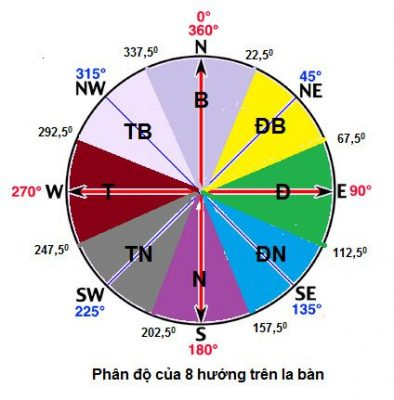

In [ ]:
def wind_direction_process(data, feature):
  for i in range(len(data)):
    if data[feature][i] <= 22.5 or 337.5 < data[feature][i]:
      data[feature][i] = 'North'
    elif 22.5 < data[feature][i] <= 67.5:
      data[feature][i] = 'North_East'
    elif 67.5 < data[feature][i] <= 112.5:
      data[feature][i] = 'East'
    elif 112.5 < data[feature][i] <= 157.5:
      data[feature][i] = 'South_East'
    elif 157.5 < data[feature][i] <= 202.5:
      data[feature][i] = 'South'
    elif 202.5 < data[feature][i] <= 247.5:
      data[feature][i] = 'South_West'
    elif 247.5 < data[feature][i] <= 292.5:
      data[feature][i] = 'West'
    elif 292.5 < data[feature][i] <= 337.5:
      data[feature][i] = 'North_West'

In [ ]:
wind_direction_process(df, 'WD2M')
wind_direction_process(df, 'WD10M')

<ipython-input-11-4a3ec7a79a01>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature][i] = 'South_West'


In [ ]:
df

,Location,YEAR,Month,Day,ShWave,UVA,UVB,UVindx,Lon,Lat,...,EarthSkin,SpecHumid2M,RelHumid2M,Precipitation,SfPressure,WiSpeed2M,WiDirect2M,WiSpeed10M,WiDirect10M,WSfSoil
0,AnGiang,2022,October,1,5.04,13.66,0.40,2.02,105.1541,10.5026,...,26.59,19.84,poor_high,4.89,100.75,2.45,South_West,3.59,South_West,0.94
1,AnGiang,2022,October,2,3.42,9.98,0.29,1.45,105.1541,10.5026,...,26.98,19.23,poor_high,6.55,100.68,1.18,West,1.75,West,0.94
2,AnGiang,2022,October,3,4.30,11.82,0.34,1.76,105.1541,10.5026,...,26.68,19.47,poor_high,21.90,100.68,1.84,East,2.70,East,0.96
3,AnGiang,2022,October,4,4.11,11.66,0.35,1.77,105.1541,10.5026,...,26.02,18.98,poor_high,7.56,100.86,2.19,East,3.25,East,0.95
4,AnGiang,2022,October,5,4.49,12.45,0.37,1.90,105.1541,10.5026,...,26.67,19.47,poor_high,6.12,100.86,2.55,East,3.72,East,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,TuyenQuang,2022,December,27,0.95,2.75,0.07,0.37,105.2280,21.7767,...,16.97,10.93,poor_high,3.53,99.82,1.52,South_East,2.87,South_East,0.75
5792,TuyenQuang,2022,December,28,0.63,1.75,0.05,0.23,105.2280,21.7767,...,12.55,7.69,poor_high,14.32,100.21,1.34,East,2.54,East,0.80
5793,TuyenQuang,2022,December,29,0.99,2.73,0.07,0.36,105.2280,21.7767,...,12.29,6.59,poor_high,4.29,100.47,0.82,East,1.48,East,0.77
5794,TuyenQuang,2022,December,30,1.65,4.33,0.10,0.55,105.2280,21.7767,...,12.48,6.59,poor_high,0.59,100.50,0.82,South_East,1.48,South_East,0.76


In [ ]:
df['Region']='?'

In [ ]:
dbsHong = {'HaNoi', 'VinhPhuc', 'BacNinh', 'QuangNinh', 'HaiDuong','HaiPhong', 'HungYen','ThaiBinh','HaNam','NamDinh','NinhBinh'}
tdmnBac = {'HaGiang', 'CaoBang','BacKan','TuyenQuang', 'LaoCai','YenBai','ThaiNguyen','LangSon','BacGiang','PhuTho','DienBien','LaiChau','SonLa','HoaBinh'}
btbdhTrung = {'ThanhHoa', 'NgheAn','HaTinh', 'QuangBinh', 'QuangTri','Hue', 'DaNang','QuangNam','QuangNgai', 'BinhDinh','PhuYen','KhanhHoa','NinhThuan','BinhThuan'}
tn ={'KonTum', 'GiaLai', 'DakLak', 'DakNong','LamDong'}
dnb ={'BinhPhuoc','TayNinh','BinhDuong','DongNai','VungTau', 'TPHCM'}
dbsCL ={'LongAn', 'TienGiang','BenTre', 'TraVinh', 'VinhLong', 'DongThap','AnGiang','KienGiang','CanTho','HauGiang','SocTrang','BacLieu','CaMau'}

for item in dbsHong:
  df.loc[df['Location'] == item, 'Region'] = 'Dong_bang_song_Hong'
for item in tdmnBac:
  df.loc[df['Location'] == item, 'Region'] = 'Trung_du_mien_nui_phia_Bac'
for item in btbdhTrung:
  df.loc[df['Location'] == item, 'Region'] = 'Bac_Trung_Bo_va_Duyen_hai_mien_Trung'
for item in tn:
  df.loc[df['Location'] == item, 'Region'] = 'TayNguyen'
for item in dnb:
  df.loc[df['Location'] == item, 'Region'] = 'Dong_Nam_Bo'
for item in dbsCL:
  df.loc[df['Location'] == item, 'Region'] = 'Dong_bang_song_Cuu_Long'

In [ ]:
df['Region'].value_counts()

Trung_du_mien_nui_phia_Bac              1288
Bac_Trung_Bo_va_Duyen_hai_mien_Trung    1288
Dong_bang_song_Cuu_Long                 1196
Dong_bang_song_Hong                     1012
Dong_Nam_Bo                              552
TayNguyen                                460
Name: Region, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       5796 non-null   object 
 1   YEAR           5796 non-null   int64  
 2   Month          5796 non-null   object 
 3   Day            5796 non-null   int64  
 4   ShWave         5796 non-null   float64
 5   UVA            5796 non-null   float64
 6   UVB            5796 non-null   float64
 7   UVindx         5796 non-null   float64
 8   Lon            5796 non-null   float64
 9   Lat            5796 non-null   float64
 10  Temp           5796 non-null   float64
 11  DewFrost       5796 non-null   float64
 12  WBulbTemp2M    5796 non-null   float64
 13  EarthSkin      5796 non-null   float64
 14  SpecHumid2M    5796 non-null   float64
 15  RelHumid2M     5796 non-null   object 
 16  Precipitation  5796 non-null   float64
 17  SfPressure     5796 non-null   float64
 18  WiSpeed2

#Duyệt các file nông sản các tỉnh

##Lúa

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Farming/Lua/V06.15.xlsx', skiprows=2, names=['Location', 'Lua'])



In [ ]:
statis

,Location,Lua
0,CẢ NƯỚC,42660.7
1,Đồng bằng sông Hồng,5887.7
2,Hà Nội,952.4
3,Hà Tây,..
4,Vĩnh Phúc,281.8
...,...,...
66,Cần Thơ,1366.7
67,Hậu Giang,1253.9
68,Sóc Trăng,2042.6
69,Bạc Liêu,1197.8


In [ ]:
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,14,29,44,50,57]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Lua'] = pd.to_numeric(statis['Lua'], errors='coerce')

In [ ]:
top = statis['Lua'].nlargest(30)

In [ ]:
top.index

Int64Index([58, 57, 56, 51, 61, 26, 59, 60, 62, 54, 27,  8,  0, 10, 52, 46, 42,
            39,  5, 55, 35, 20, 28, 63, 11, 33, 34, 41,  3, 18],
           dtype='int64')

In [ ]:
top_lua = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_lua

['KienGiang',
 'AnGiang',
 'DongThap',
 'LongAn',
 'SocTrang',
 'ThanhHoa',
 'CanTho',
 'HauGiang',
 'BacLieu',
 'TraVinh',
 'NgheAn',
 'ThaiBinh',
 'HaNoi',
 'NamDinh',
 'TienGiang',
 'TayNinh',
 'DakLak',
 'BinhThuan',
 'HaiDuong',
 'VinhLong',
 'BinhDinh',
 'BacGiang',
 'HaTinh',
 'CaMau',
 'NinhBinh',
 'QuangNam',
 'QuangNgai',
 'GiaLai',
 'BacNinh',
 'ThaiNguyen']

##KhoaiLang

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Farming/Khoai_lang/V06.29.xlsx', skiprows=2, names=['Location','KhoaiLang'])



In [ ]:
statis

,Location,KhoaiLang
0,CẢ NƯỚC,976.1
1,Đồng bằng sông Hồng,133.1
2,Hà Nội,14.6
3,Hà Tây,..
4,Vĩnh Phúc,19.7
...,...,...
66,Cần Thơ,0.7
67,Hậu Giang,1.1
68,Sóc Trăng,7.2
69,Bạc Liêu,2.5


In [ ]:
from unidecode import unidecode
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,14,29,44,50,57]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['KhoaiLang'] = pd.to_numeric(statis['KhoaiLang'], errors='coerce')

In [ ]:
top = statis['KhoaiLang'].nlargest(30)

In [ ]:
top.index

Int64Index([42, 43, 44, 41, 20, 26,  8, 58, 55, 28, 27, 29, 54, 25,  2,  4, 18,
            17, 56, 33,  0, 15, 12, 10, 19, 30, 11,  5,  6, 13],
           dtype='int64')

In [ ]:
top_khoai = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_khoai

['DakLak',
 'DakNong',
 'LamDong',
 'GiaLai',
 'BacGiang',
 'ThanhHoa',
 'ThaiBinh',
 'KienGiang',
 'VinhLong',
 'HaTinh',
 'NgheAn',
 'QuangBinh',
 'TraVinh',
 'HoaBinh',
 'VinhPhuc',
 'QuangNinh',
 'ThaiNguyen',
 'YenBai',
 'DongThap',
 'QuangNam',
 'HaNoi',
 'TuyenQuang',
 'HaGiang',
 'NamDinh',
 'LangSon',
 'QuangTri',
 'NinhBinh',
 'HaiDuong',
 'HaiPhong',
 'CaoBang']

##Lạc

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Farming/Lac/V06.35.xlsx', skiprows=2, names=['Location','Lac'])



In [ ]:
statis

,Location,Lac
0,CẢ NƯỚC,408084.0
1,Đồng bằng sông Hồng,55910.4
2,Hà Nội,5361.3
3,Vĩnh Phúc,4081.6
4,Bắc Ninh,1305.8
...,...,...
62,Đồng Tháp,221.5
63,An Giang,2149.4
64,Kiên Giang,37.5
65,Cần Thơ,62.3


In [ ]:
from unidecode import unidecode
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,13,28,43,49,56]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Lac'] = pd.to_numeric(statis['Lac'], errors='coerce')

In [ ]:
top = statis['Lac'].nlargest(30)

In [ ]:
top.index

Int64Index([34, 26, 11, 32, 27,  9, 19, 53, 25, 33, 14, 45, 38, 24, 28, 41, 42,
             7, 10, 20, 17, 29,  0, 18,  1, 40, 30, 16,  3, 47],
           dtype='int64')

In [ ]:
top_lac = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_lac

['BinhDinh',
 'NgheAn',
 'HaGiang',
 'QuangNam',
 'HaTinh',
 'NamDinh',
 'BacGiang',
 'TraVinh',
 'ThanhHoa',
 'QuangNgai',
 'TuyenQuang',
 'TayNinh',
 'BinhThuan',
 'HoaBinh',
 'QuangBinh',
 'DakLak',
 'DakNong',
 'ThaiBinh',
 'NinhBinh',
 'PhuTho',
 'ThaiNguyen',
 'QuangTri',
 'HaNoi',
 'LangSon',
 'VinhPhuc',
 'GiaLai',
 'Hue',
 'YenBai',
 'QuangNinh',
 'DongNai']

##Mía

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Farming/Mia/V06.33.xlsx', skiprows=2, names=['Location','Mia'])



In [ ]:
statis

,Location,Mia
0,CẢ NƯỚC,11083
1,Đồng bằng sông Hồng,52.1
2,Hà Nội,0.2
3,Vĩnh Phúc,0.3
4,Bắc Ninh,0.3
...,...,...
64,Kiên Giang,119.2
65,Hậu Giang,384.3
66,Sóc Trăng,283.4
67,Bạc Liêu,15.6


In [ ]:
from unidecode import unidecode
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,13,28,43,49,56]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Mia'] = pd.to_numeric(statis['Mia'], errors='coerce')

In [ ]:
top = statis['Mia'].nlargest(30)

In [ ]:
top.index

Int64Index([40, 35, 26, 25, 41, 23, 24, 45, 36, 58, 47, 59, 12, 53, 14, 57, 37,
            39, 38, 10, 49, 46,  3, 54, 48, 60, 11, 31, 61, 22],
           dtype='int64')

In [ ]:
top_mia = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_mia

['GiaLai',
 'PhuYen',
 'NgheAn',
 'ThanhHoa',
 'DakLak',
 'SonLa',
 'HoaBinh',
 'TayNinh',
 'KhanhHoa',
 'HauGiang',
 'DongNai',
 'SocTrang',
 'CaoBang',
 'TraVinh',
 'TuyenQuang',
 'KienGiang',
 'NinhThuan',
 'KonTum',
 'BinhThuan',
 'NinhBinh',
 'TPHCM',
 'BinhDuong',
 'QuangNinh',
 'VinhLong',
 'VungTau',
 'BacLieu',
 'HaGiang',
 'DaNang',
 'CaMau',
 'LaiChau']

##Ngô

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Farming/Ngo/V06.27.xlsx', skiprows=2, names=['Location','Ngo'])



In [ ]:
statis

,Location,Ngo
0,CẢ NƯỚC,4423.2
1,Đồng bằng sông Hồng,311
2,Hà Nội,72.5
3,Hà Tây,..
4,Vĩnh Phúc,43.9
...,...,...
66,Cần Thơ,6.2
67,Hậu Giang,16
68,Sóc Trăng,10.2
69,Bạc Liêu,1.2


In [ ]:
from unidecode import unidecode
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,14,29,44,50,57]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Ngo'] = pd.to_numeric(statis['Ngo'], errors='coerce')

In [ ]:
top = statis['Ngo'].nlargest(30)

In [ ]:
top.index

Int64Index([42, 24, 48, 43, 27, 41, 12, 26, 13, 16, 25, 17, 19, 39, 15, 21, 22,
            23, 18,  0, 14, 28, 34, 33, 38,  8, 57, 35, 49,  2],
           dtype='int64')

In [ ]:
top_ngo = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_ngo

['DakLak',
 'SonLa',
 'DongNai',
 'DakNong',
 'NgheAn',
 'GiaLai',
 'HaGiang',
 'ThanhHoa',
 'CaoBang',
 'LaoCai',
 'HoaBinh',
 'YenBai',
 'LangSon',
 'BinhThuan',
 'TuyenQuang',
 'PhuTho',
 'DienBien',
 'LaiChau',
 'ThaiNguyen',
 'HaNoi',
 'BacKan',
 'HaTinh',
 'QuangNgai',
 'QuangNam',
 'NinhThuan',
 'ThaiBinh',
 'AnGiang',
 'BinhDinh',
 'VungTau',
 'VinhPhuc']

##Cam

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Farming/Cam/V06.40.xlsx', skiprows=2, names=['Location','Cam'])



In [ ]:
statis

,Location,Cam
0,CẢ NƯỚC,1807.9
1,Hưng Yên,32.6
2,Hà Giang,65.8
3,Tuyên Quang,104.3
4,Yên Bái,14.8
5,Bắc Giang,42.0
6,Sơn La,10.2
7,Hoà Bình,105.9
8,Thanh Hoá,14.1
9,Nghệ An,55.7


In [ ]:
from unidecode import unidecode
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Cam'] = pd.to_numeric(statis['Cam'], errors='coerce')

In [ ]:
top = statis['Cam'].nlargest(30)

In [ ]:
top.index

Int64Index([15, 14, 6, 2, 18, 9, 1, 16, 8, 10, 4, 0, 19, 12, 3, 7, 11, 13, 17,
            5],
           dtype='int64')

In [ ]:
top_cam = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_cam

['VinhLong',
 'TraVinh',
 'HoaBinh',
 'TuyenQuang',
 'HauGiang',
 'HaTinh',
 'HaGiang',
 'DongThap',
 'NgheAn',
 'BinhDuong',
 'BacGiang',
 'HungYen',
 'SocTrang',
 'TienGiang',
 'YenBai',
 'ThanhHoa',
 'DongNai',
 'BenTre',
 'CanTho',
 'SonLa']

##Chè

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Farming/Che/V06.39.xlsx', skiprows=2, names=['Location','Che'])



In [ ]:
statis

,Location,Che
0,CẢ NƯỚC,1116.7
1,Hà Nội,16.8
2,Hà Giang,88.6
3,Bắc Kạn,7.8
4,Tuyên Quang,69.7
5,Lào Cai,41.7
6,Yên Bái,68.1
7,Thái Nguyên,260.9
8,Phú Thọ,178.4
9,Lai Châu,51.8


In [ ]:
from unidecode import unidecode
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Che'] = pd.to_numeric(statis['Che'], errors='coerce')

In [ ]:
top = statis['Che'].nlargest(30)

In [ ]:
top.index

Int64Index([6, 7, 11, 10, 1, 3, 5, 9, 8, 4, 0, 2], dtype='int64')

In [ ]:
top_che = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_che

['ThaiNguyen',
 'PhuTho',
 'LamDong',
 'NgheAn',
 'HaGiang',
 'TuyenQuang',
 'YenBai',
 'SonLa',
 'LaiChau',
 'LaoCai',
 'HaNoi',
 'BacKan']

##Sắn

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Farming/San/V06.31.xlsx', skiprows=2, names=['Location','San'])



In [ ]:
statis

,Location,San
0,CẢ NƯỚC,10626.9
1,Hà Nội,11.6
2,Hà Giang,47.5
3,Cao Bằng,51.9
4,Bắc Kạn,3.7
5,Tuyên Quang,22.8
6,Lào Cai,97.9
7,Yên Bái,170.6
8,Thái Nguyên,22.9
9,Lạng Sơn,9.7


In [ ]:
from unidecode import unidecode
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['San'] = pd.to_numeric(statis['San'], errors='coerce')

In [ ]:
top = statis['San'].nlargest(30)

In [ ]:
top.index

Int64Index([33, 28, 29, 24, 27, 13, 26, 35, 16, 23, 22, 15, 19,  6, 21, 36, 18,
            14, 32, 11,  5, 10, 20, 30, 34, 12,  2,  1, 25, 17],
           dtype='int64')

In [ ]:
top_san = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_san

['TayNinh',
 'GiaLai',
 'DakLak',
 'PhuYen',
 'KonTum',
 'SonLa',
 'BinhThuan',
 'DongNai',
 'NgheAn',
 'BinhDinh',
 'QuangNgai',
 'ThanhHoa',
 'QuangTri',
 'YenBai',
 'QuangNam',
 'VungTau',
 'QuangBinh',
 'HoaBinh',
 'BinhPhuoc',
 'DienBien',
 'LaoCai',
 'PhuTho',
 'Hue',
 'DakNong',
 'BinhDuong',
 'LaiChau',
 'CaoBang',
 'HaGiang',
 'KhanhHoa',
 'HaTinh']

##Bò

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Rearing/Bo/V06.43.xlsx', skiprows=2, names=['Location', 'Bo'])



In [ ]:
statis

,Location,Bo
0,CẢ NƯỚC,6339.4
1,Đồng bằng sông Hồng,470.8
2,Hà Nội,129.6
3,Hà Tây,..
4,Vĩnh Phúc,95.6
...,...,...
66,Cần Thơ,3.9
67,Hậu Giang,3.7
68,Sóc Trăng,54.5
69,Bạc Liêu,1.9


In [ ]:
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,14,29,44,50,57]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Bo'] = pd.to_numeric(statis['Bo'], errors='coerce')

In [ ]:
top = statis['Bo'].nlargest(30)

In [ ]:
top.index

Int64Index([27, 41, 24, 35, 34, 54, 26, 42, 53, 39, 33, 28, 36,  0, 38, 12, 51,
            52, 20, 48, 44, 13, 50, 29, 46, 22,  2, 21, 25, 40],
           dtype='int64')

In [ ]:
top_bo = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_bo

['NgheAn',
 'GiaLai',
 'SonLa',
 'BinhDinh',
 'QuangNgai',
 'TraVinh',
 'ThanhHoa',
 'DakLak',
 'BenTre',
 'BinhThuan',
 'QuangNam',
 'HaTinh',
 'PhuYen',
 'HaNoi',
 'NinhThuan',
 'HaGiang',
 'LongAn',
 'TienGiang',
 'BacGiang',
 'DongNai',
 'LamDong',
 'CaoBang',
 'TPHCM',
 'QuangBinh',
 'TayNinh',
 'DienBien',
 'VinhPhuc',
 'PhuTho',
 'HoaBinh',
 'KonTum']

##Trâu

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Rearing/Trau/V06.42.xlsx', skiprows=2, names=['Location', 'Trau'])



In [ ]:
statis

,Location,Trau
0,CẢ NƯỚC,2231.6
1,Đồng bằng sông Hồng,119.7
2,Hà Nội,28.7
3,Hà Tây,..
4,Vĩnh Phúc,16.9
...,...,...
66,Cần Thơ,0.2
67,Hậu Giang,1.3
68,Sóc Trăng,2.4
69,Bạc Liêu,0.9


In [ ]:
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,14,29,44,50,57]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Trau'] = pd.to_numeric(statis['Trau'], errors='coerce')

In [ ]:
top = statis['Trau'].nlargest(30)

In [ ]:
top.index

Int64Index([27, 26, 12, 22, 24, 25, 13, 16, 23, 17, 15, 28, 19, 34, 33, 21, 18,
            14, 29, 20,  0, 42,  4, 40, 30,  2, 35, 31, 44, 41],
           dtype='int64')

In [ ]:
top_trau = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_trau

['NgheAn',
 'ThanhHoa',
 'HaGiang',
 'DienBien',
 'SonLa',
 'HoaBinh',
 'CaoBang',
 'LaoCai',
 'LaiChau',
 'YenBai',
 'TuyenQuang',
 'HaTinh',
 'LangSon',
 'QuangNgai',
 'QuangNam',
 'PhuTho',
 'ThaiNguyen',
 'BacKan',
 'QuangBinh',
 'BacGiang',
 'HaNoi',
 'DakLak',
 'QuangNinh',
 'KonTum',
 'QuangTri',
 'VinhPhuc',
 'BinhDinh',
 'Hue',
 'LamDong',
 'GiaLai']

##Lợn

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Rearing/Lon/V06.44.xlsx', skiprows=2, names=['Location', 'Lon'])



In [ ]:
statis

,Location,Lon
0,CẢ NƯỚC,24684.9
1,Đồng bằng sông Hồng,4812.5
2,Hà Nội,1261.3
3,Hà Tây,..
4,Vĩnh Phúc,492.8
...,...,...
66,Cần Thơ,119.2
67,Hậu Giang,118
68,Sóc Trăng,164.4
69,Bạc Liêu,199.2


In [ ]:
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,14,29,44,50,57]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Lon'] = pd.to_numeric(statis['Lon'], errors='coerce')

In [ ]:
top = statis['Lon'].nlargest(30)

In [ ]:
top.index

Int64Index([48, 45,  0, 26, 42, 27, 20, 47, 35, 21,  8, 10, 41, 24, 12, 15,  2,
            17,  7, 25, 18, 34, 39, 28,  9, 53, 16, 44,  5, 49],
           dtype='int64')

In [ ]:
top_lon = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_lon

['DongNai',
 'BinhPhuoc',
 'HaNoi',
 'ThanhHoa',
 'DakLak',
 'NgheAn',
 'BacGiang',
 'BinhDuong',
 'BinhDinh',
 'PhuTho',
 'ThaiBinh',
 'NamDinh',
 'GiaLai',
 'SonLa',
 'HaGiang',
 'TuyenQuang',
 'VinhPhuc',
 'YenBai',
 'HungYen',
 'HoaBinh',
 'ThaiNguyen',
 'QuangNgai',
 'BinhThuan',
 'HaTinh',
 'HaNam',
 'BenTre',
 'LaoCai',
 'LamDong',
 'HaiDuong',
 'VungTau']

##Gia cầm

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Rearing/Gia_cam/V06.45.xlsx', skiprows=2, names=['Location', 'GiaCam'])



In [ ]:
statis

,Location,GiaCam
0,CẢ NƯỚC,544474.3
1,Đồng bằng sông Hồng,127546.5
2,Hà Nội,35700
3,Hà Tây,..
4,Vĩnh Phúc,12263.7
...,...,...
66,Cần Thơ,2271.1
67,Hậu Giang,4348.9
68,Sóc Trăng,6415.9
69,Bạc Liêu,3326.8


In [ ]:
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,14,29,44,50,57]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['GiaCam'] = pd.to_numeric(statis['GiaCam'], errors='coerce')

In [ ]:
top = statis['GiaCam'].nlargest(30)

In [ ]:
top.index

Int64Index([ 0, 27, 26, 48, 20, 52, 42, 21, 47,  5, 18,  8,  2, 55, 46, 45, 28,
            35, 10, 51,  7, 25,  9,  6, 33, 24, 53, 41, 54, 17],
           dtype='int64')

In [ ]:
top_giacam = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_giacam

['HaNoi',
 'NgheAn',
 'ThanhHoa',
 'DongNai',
 'BacGiang',
 'TienGiang',
 'DakLak',
 'PhuTho',
 'BinhDuong',
 'HaiDuong',
 'ThaiNguyen',
 'ThaiBinh',
 'VinhPhuc',
 'VinhLong',
 'TayNinh',
 'BinhPhuoc',
 'HaTinh',
 'BinhDinh',
 'NamDinh',
 'LongAn',
 'HungYen',
 'HoaBinh',
 'HaNam',
 'HaiPhong',
 'QuangNam',
 'SonLa',
 'BenTre',
 'GiaLai',
 'TraVinh',
 'YenBai']

##Cá

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Fishery/Ca/V06.67.xlsx', skiprows=2, names=['Location', 'Ca'])



In [ ]:
statis

,Location,Ca
0,CẢ NƯỚC,3503424
1,Đồng bằng sông Hồng,567669
2,Hà Nội,121660
3,Hà Tây,..
4,Vĩnh Phúc,22097
...,...,...
66,Cần Thơ,231778
67,Hậu Giang,73098
68,Sóc Trăng,92429
69,Bạc Liêu,96262


In [ ]:
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,14,29,44,50,57]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Ca'] = pd.to_numeric(statis['Ca'], errors='coerce')

In [ ]:
top = statis['Ca'].nlargest(30)

In [ ]:
top.index

Int64Index([56, 57, 59, 52, 53, 55, 63,  0, 58, 62,  5, 61, 54, 60, 10,  6, 48,
            27, 51,  7, 20,  8, 21,  3, 26, 11,  9,  2, 42,  4],
           dtype='int64')

In [ ]:
top_ca = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_ca

['DongThap',
 'AnGiang',
 'CanTho',
 'TienGiang',
 'BenTre',
 'VinhLong',
 'CaMau',
 'HaNoi',
 'KienGiang',
 'BacLieu',
 'HaiDuong',
 'SocTrang',
 'TraVinh',
 'HauGiang',
 'NamDinh',
 'HaiPhong',
 'DongNai',
 'NgheAn',
 'LongAn',
 'HungYen',
 'BacGiang',
 'ThaiBinh',
 'PhuTho',
 'BacNinh',
 'ThanhHoa',
 'NinhBinh',
 'HaNam',
 'VinhPhuc',
 'DakLak',
 'QuangNinh']

##Tôm

In [ ]:
statis = pd.read_excel('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/ThongKe/Fishery/Tom/V06.68.xlsx', skiprows=2, names=['Location', 'Tom'])



In [ ]:
statis

,Location,Tom
0,CẢ NƯỚC,1145362
1,Đồng bằng sông Hồng,51767
2,Hà Nội,..
3,Hà Tây,..
4,Bắc Ninh,135
...,...,...
59,Cần Thơ,5
60,Hậu Giang,37
61,Sóc Trăng,192076
62,Bạc Liêu,187157


In [ ]:
for i in range(len(statis)):
  statis.loc[i, 'Location'] = unidecode(statis.loc[i,'Location']).replace(' ','')

In [ ]:
statis = statis.drop([0,1,14,29,44,50,57]).reset_index(drop=True)

In [ ]:
statis.loc[statis['Location'] == 'ThuaThienHue', 'Location'] = 'Hue'
statis.loc[statis['Location'] == 'BaRia-VungTau', 'Location'] = 'VungTau'
statis.loc[statis['Location'] == 'TP.HoChiMinh', 'Location'] = 'TPHCM'

In [ ]:
statis['Tom'] = pd.to_numeric(statis['Tom'], errors='coerce')

In [ ]:
top = statis['Tom'].nlargest(30)

In [ ]:
top.index

Int64Index([56, 54, 55, 47, 51, 22, 48, 46, 40,  3, 45, 29, 32, 44, 24, 42, 31,
             9, 43, 27,  5, 23,  7, 25, 30, 26, 34, 35, 33, 10],
           dtype='int64')

In [ ]:
top_tom = [statis.loc[x, 'Location'] for x in top.index]

In [ ]:
top_tom

['CaMau',
 'SocTrang',
 'BacLieu',
 'BenTre',
 'KienGiang',
 'BacTrungBovaDuyenhaimienTrung',
 'TraVinh',
 'TienGiang',
 'DongNamBo',
 'QuangNinh',
 'LongAn',
 'QuangNam',
 'PhuYen',
 'TPHCM',
 'NgheAn',
 'DongNai',
 'BinhDinh',
 'NamDinh',
 'VungTau',
 'ThuaThien-Hue',
 'HaiPhong',
 'ThanhHoa',
 'ThaiBinh',
 'HaTinh',
 'QuangNgai',
 'QuangTri',
 'NinhThuan',
 'BinhThuan',
 'KhanhHoa',
 'NinhBinh']

#Tạo thuộc tính trồng trọt

In [ ]:
farming = dict()

def browse(farm, top, product):
  for locat in top:
    if locat in farm:
      temp = farm.get(locat)
      farm[locat] = temp+[product]
    else:
      farm[locat] = [product]

browse(farming, top_lua, 'lua')
browse(farming, top_khoai, 'khoai')
browse(farming, top_lac, 'lac')
browse(farming, top_mia, 'mia')
browse(farming, top_ngo, 'ngo')
browse(farming, top_cam, 'cam')
browse(farming, top_che, 'che')
browse(farming, top_san, 'san')

In [ ]:
farming

{'KienGiang': ['lua', 'khoai', 'mia'],
 'AnGiang': ['lua', 'ngo'],
 'DongThap': ['lua', 'khoai', 'cam'],
 'LongAn': ['lua'],
 'SocTrang': ['lua', 'mia', 'cam'],
 'ThanhHoa': ['lua', 'khoai', 'lac', 'mia', 'ngo', 'cam', 'san'],
 'CanTho': ['lua', 'cam'],
 'HauGiang': ['lua', 'mia', 'cam'],
 'BacLieu': ['lua', 'mia'],
 'TraVinh': ['lua', 'khoai', 'lac', 'mia', 'cam'],
 'NgheAn': ['lua', 'khoai', 'lac', 'mia', 'ngo', 'cam', 'che', 'san'],
 'ThaiBinh': ['lua', 'khoai', 'lac', 'ngo'],
 'HaNoi': ['lua', 'khoai', 'lac', 'ngo', 'che'],
 'NamDinh': ['lua', 'khoai', 'lac'],
 'TienGiang': ['lua', 'cam'],
 'TayNinh': ['lua', 'lac', 'mia', 'san'],
 'DakLak': ['lua', 'khoai', 'lac', 'mia', 'ngo', 'san'],
 'BinhThuan': ['lua', 'lac', 'mia', 'ngo', 'san'],
 'HaiDuong': ['lua', 'khoai'],
 'VinhLong': ['lua', 'khoai', 'mia', 'cam'],
 'BinhDinh': ['lua', 'lac', 'ngo', 'san'],
 'BacGiang': ['lua', 'khoai', 'lac', 'cam'],
 'HaTinh': ['lua', 'khoai', 'lac', 'ngo', 'cam', 'san'],
 'CaMau': ['lua', 'mia'],
 '

In [ ]:
df['Farming'] = '?'

In [ ]:
for item in farming:
  df.loc[df['Location']== item, 'Farming'] = df.loc[df['Location']== item, 'Farming'].apply(lambda x: farming.get(item))

In [ ]:
df['Farming'].value_counts()

[mia, san]                                    276
[lua, mia, cam]                               184
[lua, lac, ngo, san]                          184
[lua, khoai, lac, ngo, che]                   184
[khoai, lac, ngo]                             184
[mia]                                         184
[lua, cam]                                    184
[lua, khoai, lac, mia, ngo, san]              184
[khoai, lac, san]                             184
[cam]                                         184
[lua]                                         184
[lua, mia]                                    184
[lua, khoai, lac]                              92
[lua, khoai, lac, mia]                         92
[mia, ngo]                                     92
[ngo, che, san]                                92
[lac, ngo, che, san]                           92
[lua, khoai, lac, mia, ngo, cam, che, san]     92
[mia, ngo, cam, che, san]                      92
[lua, khoai, lac, ngo, san]                    92


#Tạo thuộc tính chăn nuôi

In [ ]:
rearing = dict()

browse(rearing, top_bo, 'bo')
browse(rearing, top_trau, 'trau')
browse(rearing, top_lon, 'heo')
browse(rearing, top_giacam, 'giacam')

In [ ]:
rearing

{'NgheAn': ['bo', 'trau', 'heo', 'giacam'],
 'GiaLai': ['bo', 'trau', 'heo', 'giacam'],
 'SonLa': ['bo', 'trau', 'heo', 'giacam'],
 'BinhDinh': ['bo', 'trau', 'heo', 'giacam'],
 'QuangNgai': ['bo', 'trau', 'heo'],
 'TraVinh': ['bo', 'giacam'],
 'ThanhHoa': ['bo', 'trau', 'heo', 'giacam'],
 'DakLak': ['bo', 'trau', 'heo', 'giacam'],
 'BenTre': ['bo', 'heo', 'giacam'],
 'BinhThuan': ['bo', 'heo'],
 'QuangNam': ['bo', 'trau', 'giacam'],
 'HaTinh': ['bo', 'trau', 'heo', 'giacam'],
 'PhuYen': ['bo'],
 'HaNoi': ['bo', 'trau', 'heo', 'giacam'],
 'NinhThuan': ['bo'],
 'HaGiang': ['bo', 'trau', 'heo'],
 'LongAn': ['bo', 'giacam'],
 'TienGiang': ['bo', 'giacam'],
 'BacGiang': ['bo', 'trau', 'heo', 'giacam'],
 'DongNai': ['bo', 'heo', 'giacam'],
 'LamDong': ['bo', 'trau', 'heo'],
 'CaoBang': ['bo', 'trau'],
 'TPHCM': ['bo'],
 'QuangBinh': ['bo', 'trau'],
 'TayNinh': ['bo', 'giacam'],
 'DienBien': ['bo', 'trau'],
 'VinhPhuc': ['bo', 'trau', 'heo', 'giacam'],
 'PhuTho': ['bo', 'trau', 'heo', 'giaca

In [ ]:
len(rearing)

50

In [ ]:
df['Rearing'] = '?'

In [ ]:
for item in rearing:
  df.loc[df['Location']== item, 'Rearing'] = df.loc[df['Location']== item, 'Rearing'].apply(lambda x: rearing.get(item))

In [ ]:
df['Rearing'].value_counts()

?                          1196
[bo, trau, heo, giacam]    1104
[heo, giacam]               644
[trau]                      552
[bo, trau]                  368
[bo, giacam]                368
[bo, trau, heo]             276
[bo]                        276
[bo, heo, giacam]           184
[giacam]                    184
[trau, heo]                 184
[trau, heo, giacam]         184
[heo]                        92
[bo, heo]                    92
[bo, trau, giacam]           92
Name: Rearing, dtype: int64

#Tạo thuộc tính thủy sản

In [ ]:
fishery = dict()

browse(fishery, top_ca, 'ca')
browse(fishery, top_tom, 'tom')

In [ ]:
fishery

{'DongThap': ['ca'],
 'AnGiang': ['ca'],
 'CanTho': ['ca'],
 'TienGiang': ['ca', 'tom'],
 'BenTre': ['ca', 'tom'],
 'VinhLong': ['ca'],
 'CaMau': ['ca', 'tom'],
 'HaNoi': ['ca'],
 'KienGiang': ['ca', 'tom'],
 'BacLieu': ['ca', 'tom'],
 'HaiDuong': ['ca'],
 'SocTrang': ['ca', 'tom'],
 'TraVinh': ['ca', 'tom'],
 'HauGiang': ['ca'],
 'NamDinh': ['ca', 'tom'],
 'HaiPhong': ['ca', 'tom'],
 'DongNai': ['ca', 'tom'],
 'NgheAn': ['ca', 'tom'],
 'LongAn': ['ca', 'tom'],
 'HungYen': ['ca'],
 'BacGiang': ['ca'],
 'ThaiBinh': ['ca', 'tom'],
 'PhuTho': ['ca'],
 'BacNinh': ['ca'],
 'ThanhHoa': ['ca', 'tom'],
 'NinhBinh': ['ca', 'tom'],
 'HaNam': ['ca'],
 'VinhPhuc': ['ca'],
 'DakLak': ['ca'],
 'QuangNinh': ['ca', 'tom'],
 'BacTrungBovaDuyenhaimienTrung': ['tom'],
 'DongNamBo': ['tom'],
 'QuangNam': ['tom'],
 'PhuYen': ['tom'],
 'TPHCM': ['tom'],
 'BinhDinh': ['tom'],
 'VungTau': ['tom'],
 'ThuaThien-Hue': ['tom'],
 'HaTinh': ['tom'],
 'QuangNgai': ['tom'],
 'QuangTri': ['tom'],
 'NinhThuan': ['tom']

In [ ]:
len(fishery)

44

In [ ]:
df['Fishery'] = '?'

In [ ]:
for item in fishery:
  df.loc[df['Location']== item, 'Fishery'] = df.loc[df['Location']== item, 'Fishery'].apply(lambda x: fishery.get(item))

In [ ]:
df['Fishery'].value_counts()

?            2024
[ca, tom]    1472
[ca]         1288
[tom]        1012
Name: Fishery, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       5796 non-null   object 
 1   YEAR           5796 non-null   int64  
 2   Month          5796 non-null   object 
 3   Day            5796 non-null   int64  
 4   ShWave         5796 non-null   float64
 5   UVA            5796 non-null   float64
 6   UVB            5796 non-null   float64
 7   UVindx         5796 non-null   float64
 8   Lon            5796 non-null   float64
 9   Lat            5796 non-null   float64
 10  Temp           5796 non-null   float64
 11  DewFrost       5796 non-null   float64
 12  WBulbTemp2M    5796 non-null   float64
 13  EarthSkin      5796 non-null   float64
 14  SpecHumid2M    5796 non-null   float64
 15  RelHumid2M     5796 non-null   object 
 16  Precipitation  5796 non-null   float64
 17  SfPressure     5796 non-null   float64
 18  WiSpeed2

#Lưu file xử lý

In [ ]:
%cd '/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset'
df.to_csv('Forcast_temp_in_VN.csv')

/content/drive/.shortcut-targets-by-id/1870AEZfEpMgFRt9w2rcH9wlEd1XKLe-v/Final Project/dataset
